In [732]:
from src.smth2matrix.shift2zero import shift2zero
import numpy as np
from math import ceil, floor

def line(p1, p2):
    A = (p1[1] - p2[1])
    B = (p2[0] - p1[0])
    C = (p1[0]*p2[1] - p2[0]*p1[1])
    return A, B, -C

def intersection(points1, points2):
    L1 = line(points1[0], points1[1])
    L2 = line(points2[0], points2[1])
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    if D != 0:
        x = Dx / D
        y = Dy / D
        return x,y
    else:
        return False

In [733]:
from copy import copy

h = 0.5
# points = np.array([[0.3, 3], [1, 0], [2.1, 0], [3, 3.7]])

points = np.array([[1.69276116 ,3],
 # [1.69276116 ,2.40918685],
 [0.97614341, 2.27911778],
 [1.18717325, 1.35598215],
 [0.         ,0.91673339],
 [0.62090266, 0.2566332 ],
 [1.56841545, 0.79986711],
 [1.99697896, 0.        ],
 [1.80357704, 1.01107135],
 [2, 1.3],
 # [1.80357704, 0.9],
 # [2.4401742,  1.01461923],
 [2.84740494, 1.65159917],
 [2., 2.2]])

shift2zero(points)

n_x1 = 0
n_y1 = 0
for point in points:
    if point[0] > n_x1:
        n_x1 = copy(point[0])
    if point[1] > n_y1:
        n_y1 = copy(point[1])
n_x = ceil(n_x1 / h)
n_y = ceil(n_y1 / h)

lines = []
for _ in range(n_y+1):
    lines.append([])
print(lines)

[[], [], [], [], [], [], []]


In [734]:
for k in range(0, n_y+1):
    start = None
    end = None
    intersection_start = None
    intersection_end = None
    counter = 0
    i0 = 0
    while i0 < points.shape[0]:
        if i0 == points.shape[0]-1:
            i1 = 0
        else:
            i1 = (i0 + 1)
        if i0 == 0:
            i2 = points.shape[0]-1
        else:
            i2 = (i0 - 1)

        #вершина лежит на линии
        if points[i0][1] == k*h:
            if points[i2][1] < k*h and points[i1][1] < k*h:
                lines[k].append([points[i0][0], points[i0][0]])
            elif points[i2][1] > k*h and points[i1][1] > k*h:
                lines[k].append([points[i0][0], points[i0][0]])
            else:
                if start is None:
                    start = copy(points[i0][0])
                else:
                    end = copy(points[i0][0])

        #ребро пересекает линию
        elif points[i0][1] < k*h < points[i1][1] or points[i1][1] < k*h < points[i0][1]:
            intersection_point = intersection([points[i0], points[i1]], [[0, k*h], [n_x, k*h]])[0]
            if start is None:
                start = copy(intersection_point)
            else:
                end = copy(intersection_point)
        if k == 5:
            print('start:', start, 'end:', end)

        if end is not None:
            lines[k].append([start, end])
            start = None
            end = None
        # изменить
        #extension algorithm
        # if k*(h + 1) > points[i0][1] > k*h >= points[i1][1] and points[i2][1] <= k*h:
        #     lines[k+1].append([points[i0][0], points[i0][0]])
        #     print('1', k, start)
        # elif  points[i1][1] >= (k+1)*h > points[i0][1] > k*h  and  points[i2][1] >= (k+1)*h:
        #     lines[k].append([points[i0][0], points[i0][0]])
        #     print('2', k, start)
        i0 += 1

print(lines)

start: 1.1957189732749618 end: None
start: 1.1957189732749618 end: None
start: 1.1957189732749618 end: None
start: 1.1957189732749618 end: None
start: 1.1957189732749618 end: None
start: 1.1957189732749618 end: None
start: 1.1957189732749618 end: None
start: 1.1957189732749618 end: None
start: 1.1957189732749618 end: None
start: 1.1957189732749618 end: None
start: 1.1957189732749618 end: 1.8847854350000002
[[[1.99697896, 1.99697896]], [[0.3919872684202945, 1.0453849160163302], [1.729082265260295, 1.9013368868663878]], [[0.2250476290705583, 1.8056948137327755]], [[1.1542506080230632, 2.4820289763482664]], [[1.0399500474434655, 2.309045826936476]], [[1.1957189732749618, 1.8847854350000002]], [[1.69276116, 1.69276116]]]


In [735]:
for k in range(0, n_y+1):
    i = 0
    intersection_start = None
    intersection_end = None
    max = 0
    min = None
    income = False
    outcome = False
    while i < len(points):
        if i == points.shape[0]-1:
            i1 = 0
        else:
            i1 = (i + 1)
        if i == 0:
            i2 = points.shape[0]-1
        else:
            i2 = (i - 1)
        if points[i][1] < k*h < points[i1][1] or points[i1][1] < k*h < points[i][1]:
            if not income:
                income = True
            else:
                income = False
        elif k*h < points[i][1] <= (k+1)*h:
            print('k:', k, '; points:', points[i][1], 'kh:', k*h, '(k+1)*h:', (k+1)*h)
            intersection_point = intersection([points[i2], points[i]], [[0, k*h], [n_x, k*h]])[0]
            intersection_start = copy(intersection_point)
            j = i
            min = points[i][0]
            max = points[i][0]
            while k*h < points[j][1] < (k+1)*h and j < len(points) - 1:
                if max < points[j][1]:
                    max = copy(points[j][1])
                elif min > points[j][1]:
                    min = copy(points[j][1])
                j+=1
                if j >= len(points):
                    j = len(points) - j
            if points[j][1] >= (k+1)*h:
                intersection_point = intersection([points[j - 1], points[j]], [[0, (k+1)*h], [n_x, (k+1)*h]])[0]
                intersection_end = copy(intersection_point)
                if intersection_end < max and intersection_start < max:
                    print([copy(intersection_start), copy(max)])
                    print([copy(intersection_end), copy(max)])
                    lines[k].append([copy(intersection_start), copy(max)])
                    lines[k+1].append([copy(intersection_end), copy(max)])
            elif points[j][1] <= k*h:
                intersection_point = intersection([points[j - 1], points[j]], [[0, k*h], [n_x, k*h]])[0]
                intersection_end = copy(intersection_point)

        i+=1

k: 0 ; points: 0.2566332 kh: 0.0 (k+1)*h: 0.5
k: 2 ; points: 1.01107135 kh: 1.0 (k+1)*h: 1.5
k: 2 ; points: 1.3 kh: 1.0 (k+1)*h: 1.5
k: 3 ; points: 1.65159917 kh: 1.5 (k+1)*h: 2.0
[2.4820289763482664, 2.84740494]
[2.309045826936476, 2.84740494]
k: 4 ; points: 2.2 kh: 2.0 (k+1)*h: 2.5


In [736]:
for line in lines:
    print(line)

[[1.99697896, 1.99697896]]
[[0.3919872684202945, 1.0453849160163302], [1.729082265260295, 1.9013368868663878]]
[[0.2250476290705583, 1.8056948137327755]]
[[1.1542506080230632, 2.4820289763482664], [2.4820289763482664, 2.84740494]]
[[1.0399500474434655, 2.309045826936476], [2.309045826936476, 2.84740494]]
[[1.1957189732749618, 1.8847854350000002]]
[[1.69276116, 1.69276116]]


In [737]:
from copy import copy

# для всех прямых:
for i in range(len(lines) - 2):
    for j in range(len(lines[i])):
        segment = lines[i][j]
        stop = False
        j = 0
        while j <= len(lines[i+1]) - 1 and not stop:
            if j == len(lines[i+1]) - 1 and lines[i+1][j][1] < segment[0]:
                if len(lines[i]) - 1 == 0 or lines[i][j-1][1] < lines[i+1][j][1]:
                    print(i)
                    lines[i+1][j][1] = copy(segment[0])
                    stop = True
            elif lines[i+1][j][1] < segment[0] < lines[i+1][j + 1][0] and lines[i+1][j][1] < segment[1] < lines[i+1][j + 1][0]:
                lines[i+1][j][1] = copy(segment[0])
                stop = True
            j+=1
# для последней прямой:
i = len(lines)
for segment in lines[i - 1]:
    stop = False
    j = 0
    while j < len(lines[i-2]) and not stop:
        if j != len(lines[i-2]) - 1:
            if lines[i-2][j][1] < segment[0] < lines[i-2][j + 1][0] and lines[i-2][j][1] < segment[1] < lines[i-2][j + 1][0]:
                lines[i-2][j][1] = copy(segment[0])
                stop = True
        elif lines[i-2][j][1] < segment[0]:
                lines[i-2][j][1] = copy(segment[0])
                stop = True
        j += 1

0


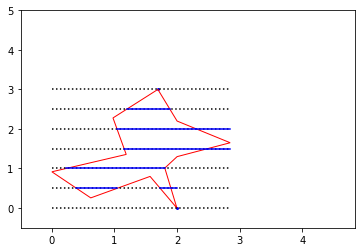

In [738]:

from matplotlib import pyplot as plt, patches

pallet_width = n_x1
pallet_height = n_y1

fig, ax = plt.subplots()

ax.set_xlim(-0.5, pallet_width + 2)
ax.set_ylim(-0.5, pallet_height + 2)

for i in range(len(lines)):
    plt.plot([0, pallet_width], [i*h, i*h], color = 'black', linestyle=':')

figure = patches.Polygon(points,
                            linewidth=1,
                            edgecolor='red',
                            fill=False)
ax.add_patch(figure)

for i in range(len(lines)):
    for sigment in lines[i]:
        if sigment[0] != sigment[1]:
            plt.plot(sigment, [i*h, i*h], color = 'blue')
        else:
            ax.scatter(sigment[0], i*h, color = 'blue', s = 4)

plt.savefig('sigments.png')